In [3]:
import os
from glob import glob
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader, Dataset, random_split
from PIL import Image 
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
BASE_DIR = "/home/jovyan/work/workspace/GAN-face-gen/"
IMAGE_DIR = "/home/jovyan/work/workspace/GAN-face-gen/data/face-images/"
PARTITION_FILE = "/home/jovyan/work/workspace/GAN-face-gen/data/list_eval_partition.csv"

In [5]:
Image_dir = "notebook/data/face-imagegen"
Glob_Image_dir1 = glob("/home/jovyan/work/workspace/GAN-face-gen/data/face-images/*")
Glob_Image_dir2 = glob("/home/jovyan/work/workspace/GAN-face-gen/data/img_align_celeba/img_align_celeba/*")
print(len(Glob_Image_dir1))
print(len(Glob_Image_dir2))

184126
183124


In [4]:
Glob_Image_dir1[1]

'/home/jovyan/work/workspace/GAN-face-gen/data/face-images/096268.jpg'

In [5]:
partition_file = pd.read_csv(PARTITION_FILE, header=None, names=['Image', 'Split'])
partition_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202600 entries, 0 to 202599
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Image   202600 non-null  object
 1   Split   202600 non-null  object
dtypes: object(2)
memory usage: 3.1+ MB


In [ ]:
# Don't run this cell 

# dfs_to_concat = []
# os_dir = os.listdir(IMAGE_DIR)
# for i in tqdm(range(len(partition_file))):
#     partition_img = partition_file.iloc[i, 0]
#     if partition_img in os_dir:
#         dfs_to_concat.append([partition_file.iloc[i,0],partition_file.iloc[i,1]])

# split_df = pd.DataFrame(dfs_to_concat, columns=['Image', 'Split'])

In [6]:
split_df = pd.read_csv("../data/valid_split.csv")

In [7]:
split_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184125 entries, 0 to 184124
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Image   184125 non-null  object
 1   Split   184125 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ MB


In [27]:
# split_df.to_csv('valid_split.csv', index=False)


<BarContainer object of 3 artists>

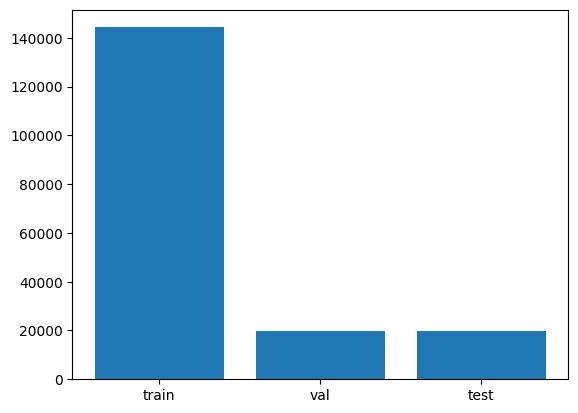

In [8]:
plt.bar(['train', 'val', 'test'], split_df['Split'].value_counts().values)

In [10]:
image_files = os.listdir(IMAGE_DIR)
image_files = [f for f in image_files if f.endswith(('.jpg', '.png'))]

len(image_files)
asdf = pd.DataFrame(image_files)

In [11]:
train_df = split_df[split_df['Split'] == 0]
val_df = split_df[split_df['Split'] == 1]
test_df = split_df[split_df['Split'] == 2]

train_df.info()
print("============================================\n")
val_df.info()
print("============================================\n")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144296 entries, 0 to 144295
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Image   144296 non-null  object
 1   Split   144296 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.3+ MB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19867 entries, 144296 to 164162
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   19867 non-null  object
 1   Split   19867 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 465.6+ KB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19962 entries, 164163 to 184124
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   19962 non-null  object
 1   Split   19962 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 467.9+ KB


In [12]:
class Dataset(Dataset):
    def __init__(self, img_dir, data, transform=None):
        self.img_dir = img_dir
        self.data = data
        self.transform = transform

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        img_name = os.path.join(self.img_dir, self.data.iloc[idx, 0])
        image = Image.open(img_name)
        if self.transform:
            image = self.transform(image)
        return image

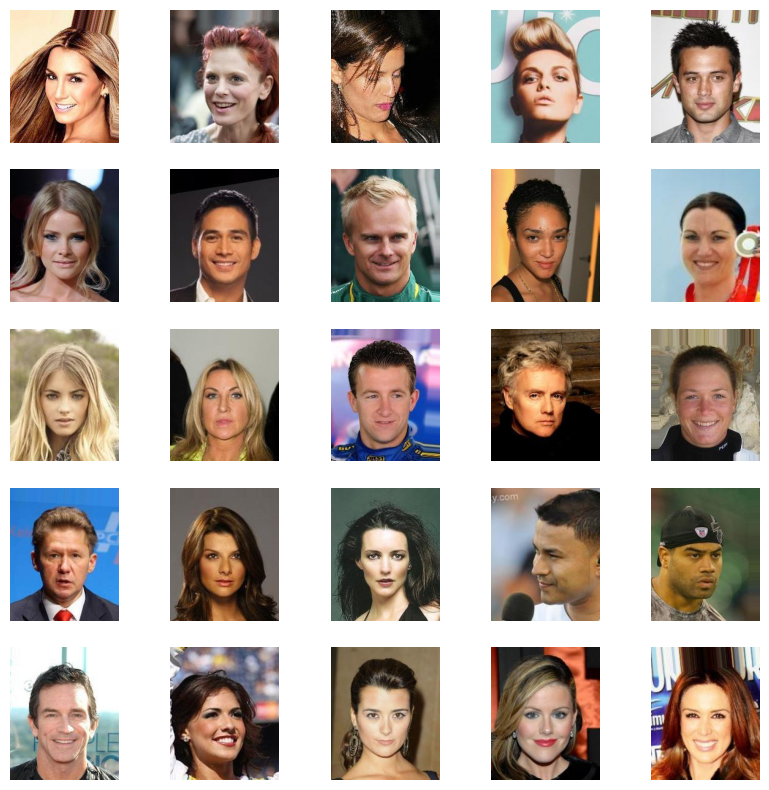

In [14]:
# View Dataset

plt.figure(1, figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    image = plt.imread(os.path.join(IMAGE_DIR, train_df.iloc[i, 0]))
    plt.imshow(image)
    plt.axis('off')
plt.show()